In [19]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sympy.combinatorics import Permutation
from itertools import permutations
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification, make_moons, make_blobs
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report, classification_report, auc, ConfusionMatrixDisplay, RocCurveDisplay
import time
import seaborn as sns
from scipy.stats.mstats import winsorize


In [20]:
random_state=254493
n_samples = 2593

X_clf, y_clf = make_classification(random_state=random_state, n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
X_moons, y_moons = make_moons(random_state=random_state, n_samples=n_samples, noise=0.1)

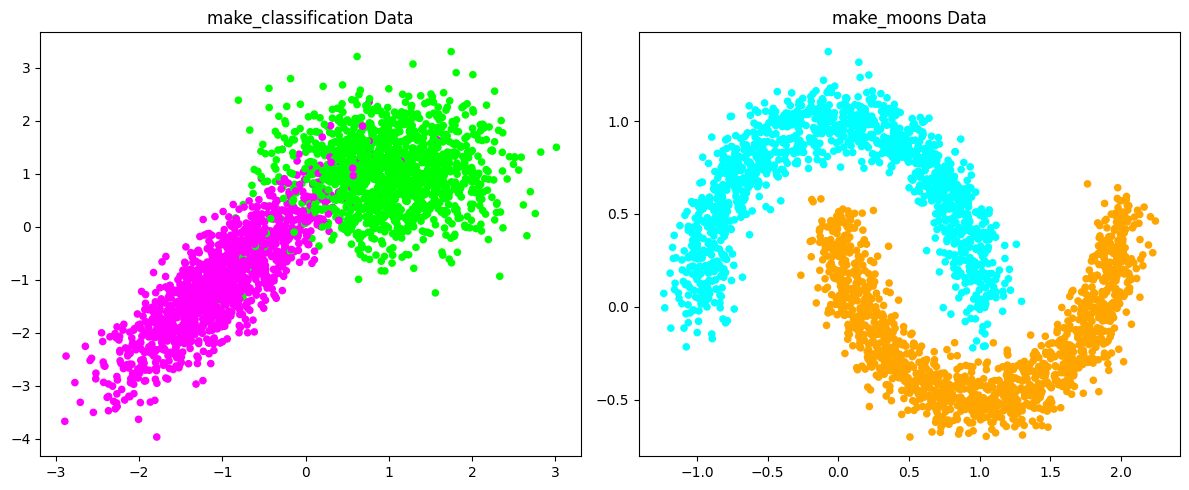

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=np.where(y_clf==0, 'lime', 'magenta'), s=20)
plt.title('make_classification Data')

plt.subplot(1, 2, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=np.where(y_moons==0, 'cyan', 'orange'), s=20)
plt.title('make_moons Data')

plt.tight_layout()
plt.show()

In [22]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=random_state)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2, random_state=random_state)

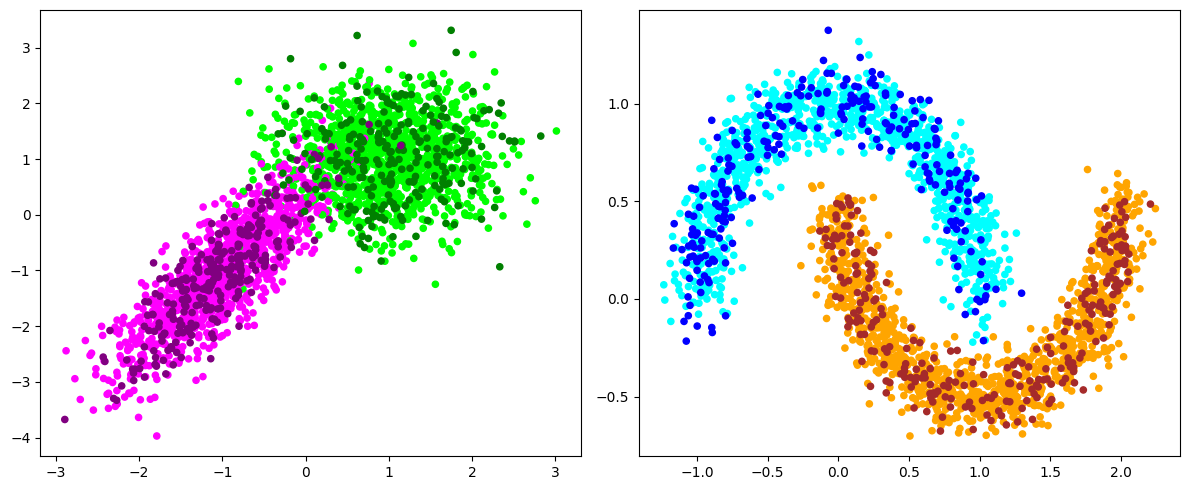

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_clf[:, 0], X_train_clf[:, 1], c=np.where(y_train_clf==0, 'lime', 'magenta'), s=20)
plt.scatter(X_test_clf[:, 0], X_test_clf[:, 1], c=np.where(y_test_clf==0, 'green', 'purple'), s=20)


plt.subplot(1, 2, 2)
plt.scatter(X_train_moons[:, 0], X_train_moons[:, 1], c=np.where(y_train_moons==0, 'cyan', 'orange'), s=20)
plt.scatter(X_test_moons[:, 0], X_test_moons[:, 1], c=np.where(y_test_moons==0, 'blue', 'brown'), s=20)

plt.tight_layout()
plt.show()


In [24]:
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

def plot_roc_and_confusion(y_test_clf, y_pred_clf, y_pred_sklearn):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    fpr1, tpr1, _ = roc_curve(y_test_clf, y_pred_clf)
    roc_auc1 = auc(fpr1, tpr1)
    axes[0, 0].plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc1:.4f})')
    axes[0, 0].set_xlim([0.0, 1.0])
    axes[0, 0].set_ylim([0.0, 1.05])
    axes[0, 0].set_xlabel('False Positive Rate')
    axes[0, 0].set_ylabel('True Positive Rate')
    axes[0, 0].set_title('ROC Curve for my implementation of DecisionTree')
    axes[0, 0].legend(loc='lower right')

    fpr2, tpr2, _ = roc_curve(y_test_clf, y_pred_sklearn)
    roc_auc2 = auc(fpr2, tpr2)
    axes[0, 1].plot(fpr2, tpr2, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc2:.4f})')
    axes[0, 1].set_xlim([0.0, 1.0])
    axes[0, 1].set_ylim([0.0, 1.05])
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('ROC Curve for sklearn implementation of DecisionTree')
    axes[0, 1].legend(loc='lower right')

    cm1 = confusion_matrix(y_test_clf, y_pred_clf)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
    axes[1, 0].set_xlabel('Predicted')
    axes[1, 0].set_ylabel('Actual')
    axes[1, 0].set_title('Confusion Matrix for my implementation of DecisionTree')

    sensitivity1, specificity1 = calculate_sensitivity_specificity(y_test_clf, y_pred_clf)
    axes[1, 0].text(0.5, -0.1, f'Sensitivity: {sensitivity1:.4f}', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].text(0.5, -0.2, f'Specificity: {specificity1:.4f}', ha='center', va='center', transform=axes[1, 0].transAxes)

    cm2 = confusion_matrix(y_test_clf, y_pred_sklearn)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 1])
    axes[1, 1].set_xlabel('Predicted')
    axes[1, 1].set_ylabel('Actual')
    axes[1, 1].set_title('Confusion Matrix for sklearn implementation of DecisionTree2')

    sensitivity2, specificity2 = calculate_sensitivity_specificity(y_test_clf, y_pred_sklearn)
    axes[1, 1].text(0.5, -0.1, f'Sensitivity: {sensitivity2:.4f}', ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].text(0.5, -0.2, f'Specificity: {specificity2:.4f}', ha='center', va='center', transform=axes[1, 1].transAxes)

    plt.tight_layout()
    plt.show()


In [25]:
def entropy_value_for_two_classes(prob_i):
    if prob_i == 0 or prob_i == 1:
        return 0
    return - prob_i * math.log(prob_i, 2) - (1 - prob_i) * math.log(1 - prob_i, 2)

In [26]:
def entropy(A, B, variable, intersection_value):
    data_size = len(A) + len(B)

    a_points_less_or_equal_intersection_value_counter = len([point for point in A if point[variable] <= intersection_value])
    b_points_less_or_equal_intersection_value_counter = len([point for point in B if point[variable] <= intersection_value])
    size_of_points_less_than_intersection_value = a_points_less_or_equal_intersection_value_counter + b_points_less_or_equal_intersection_value_counter

    a_points_higher_value_than_intersection_value_counter = len([point for point in A if point[variable] > intersection_value])
    b_points_higher_value_than_intersection_value_counter = len([point for point in B if point[variable] > intersection_value])
    size_of_points_higher_than_intersection_value = a_points_higher_value_than_intersection_value_counter + b_points_higher_value_than_intersection_value_counter

    if size_of_points_higher_than_intersection_value == 0:
        size_of_points_higher_than_intersection_value = 1

    if size_of_points_less_than_intersection_value == 0:
        size_of_points_less_than_intersection_value = 1

    return (size_of_points_less_than_intersection_value / data_size) * entropy_value_for_two_classes(a_points_less_or_equal_intersection_value_counter / size_of_points_less_than_intersection_value) + (size_of_points_higher_than_intersection_value / data_size) * entropy_value_for_two_classes(a_points_higher_value_than_intersection_value_counter / size_of_points_higher_than_intersection_value)

In [27]:
def count_entropies_for_given_intersections(A, B, x_intersections, y_intersections):
    entropies_dict = {}
    for x_intersection in x_intersections:
        entropies_dict[(0, x_intersection)] = [entropy(A, B, 0, x_intersection), 0, x_intersection]

    for y_intersection in y_intersections:
        entropies_dict[(1, y_intersection)] = [entropy(A, B, 1, y_intersection), 1, y_intersection]
    
    return entropies_dict

In [28]:
def update_ranges(curr_x_range, curr_y_range, limit):
    new_x_range = curr_x_range[:]
    new_y_range = curr_y_range[:]

    if not limit[1]:
        if limit[0] == 0:
            new_x_range[0] = limit[2]
        else:
           
            new_y_range[0] = limit[2]
    else:
        if limit[0] == 0:
            new_x_range[1] = limit[2]
        else:
            new_y_range[1] = limit[2]

    return [new_x_range, new_y_range]

In [29]:
class DecisionTree:
    def __init__(self):
        self.tree = []

    def fit(self, A, B, x_intersections, y_intersections):
        self.tree = []
        self._intersect_set_by_lowest_entropy(A, B, x_intersections, y_intersections)

    def _intersect_set_by_lowest_entropy(self, A, B, x_intersections, y_intersections, 
                                         x_range=[-float('inf'), float('inf')], 
                                         y_range=[-float('inf'), float('inf')]):
        if len(A) == 0:
            self.tree.append({'samples': B, 'class': 'B', 'range': [x_range, y_range]})
            return
        elif len(B) == 0:
            self.tree.append({'samples': A, 'class': 'A', 'range': [x_range, y_range]})
            return
        else:
            self.tree.append({'samples': np.vstack((A, B)), 'class': 'node', 'range': [x_range, y_range]})

        entropies_dict = count_entropies_for_given_intersections(A, B, x_intersections, y_intersections)
        min_key = min(entropies_dict, key=entropies_dict.get)

        variable = min_key[0]
        intersection_value = min_key[1]

        A_less = [point for point in A if point[variable] <= intersection_value]
        B_less = [point for point in B if point[variable] <= intersection_value]
        ranges_for_set_with_less_values = update_ranges(x_range, y_range, [variable, True, intersection_value])

        A_higher = [point for point in A if point[variable] > intersection_value]
        B_higher = [point for point in B if point[variable] > intersection_value]
        ranges_for_set_with_higher_values = update_ranges(x_range, y_range, [variable, False, intersection_value])

        self._intersect_set_by_lowest_entropy(A_less, B_less, x_intersections, y_intersections, ranges_for_set_with_less_values[0], ranges_for_set_with_less_values[1])
        self._intersect_set_by_lowest_entropy(A_higher, B_higher, x_intersections, y_intersections, ranges_for_set_with_higher_values[0], ranges_for_set_with_higher_values[1])

    def predict(self, X):
        predictions = []
        for point in X:
            predictions.append(self._classify_point(point))
        return predictions

    def _classify_point(self, point):
        for node in self.tree:
            if node['class'] == 'node':
                continue
            x_range, y_range = node['range']
            if x_range[0] <= point[0] <= x_range[1] and y_range[0] <= point[1] <= y_range[1]:
                return 0 if node['class'] == 'A' else 1
        return None

In [30]:
x_intersections_for_clf = np.linspace(-3.2, 3.2, 6400)
y_intersections_for_clf = np.linspace(-4.2, 3.3, 7500)

In [31]:
A_train_clf = X_train_clf[y_train_clf == 0]
B_train_clf = X_train_clf[y_train_clf == 1]

In [32]:
dt = DecisionTree()
dt.fit(A_train_clf, B_train_clf, x_intersections_for_clf, y_intersections_for_clf)
y_pred = dt.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9421965317919075


In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train_clf, y_train_clf)
y_pred_sklearn = clf.predict(X_test_clf)
accuracy_sklearn = accuracy_score(y_test_clf, y_pred_sklearn)
print(f"Accuracy (sklearn): {accuracy_sklearn}")

Accuracy (sklearn): 0.9364161849710982


In [34]:
def create_meshgrid(X, step=0.01):
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    return xx, yy

def plot_decision_boundary(model, X, y, title, ax, col1, col2, accuracy=None):
    xx, yy = create_meshgrid(X)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)
    cmap_light = ListedColormap([col1, col2])
    cmap_bold = ListedColormap([col1, col2]) 

    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=5)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    if accuracy is not None:
        accuracy_text = f'Accuracy: {accuracy:.4f}'
        ax.text(0.95, 0.05, accuracy_text, transform=ax.transAxes, fontsize=12,
                verticalalignment='bottom', horizontalalignment='right',
                bbox=dict(facecolor='white', alpha=0.5))


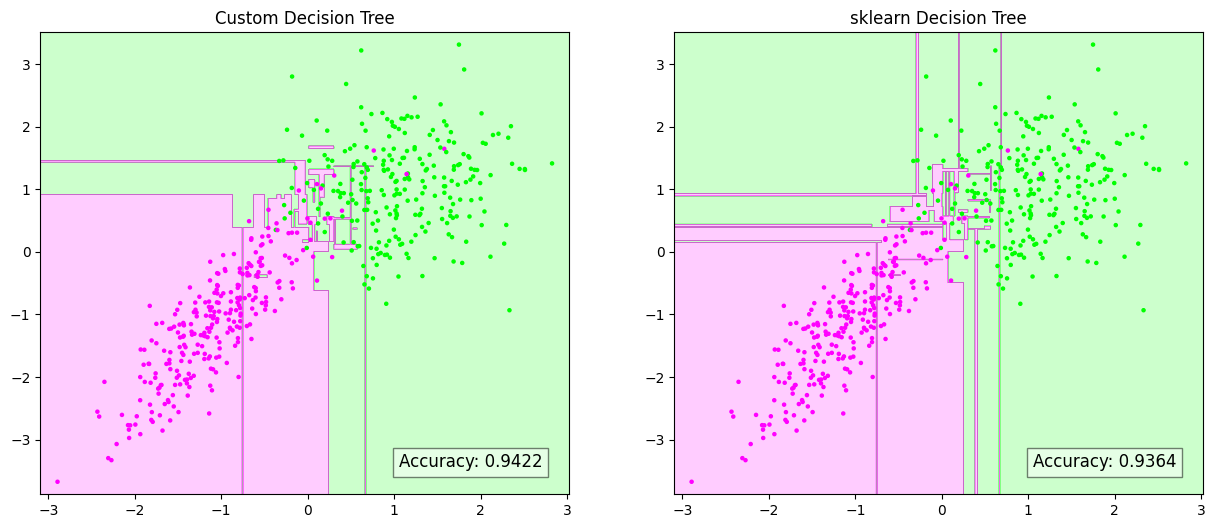

In [35]:
xx, yy = create_meshgrid(X_clf)

Z_custom = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom = np.array(Z_custom).reshape(xx.shape)

Z_sklearn = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

plot_decision_boundary(dt, X_test_clf, y_test_clf, 'Custom Decision Tree', ax1, 'lime', 'magenta', accuracy=accuracy)
plot_decision_boundary(clf, X_test_clf, y_test_clf, 'sklearn Decision Tree', ax2, 'lime', 'magenta', accuracy=accuracy_sklearn)

plt.show()

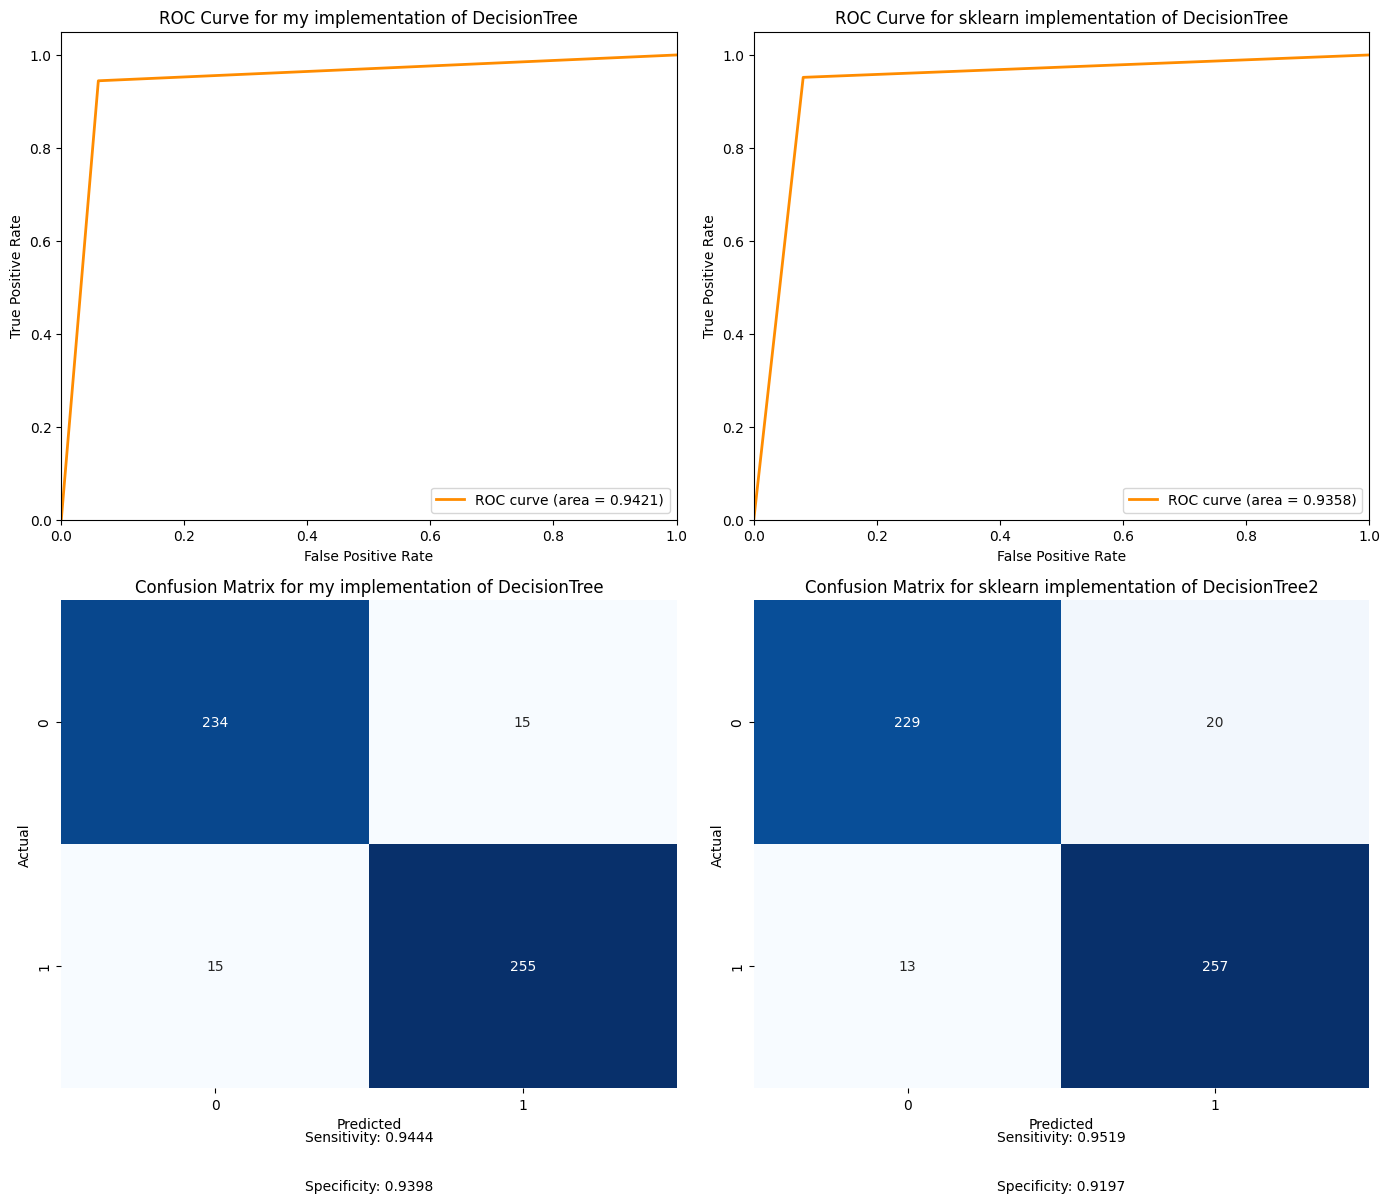

In [36]:
plot_roc_and_confusion(y_test_clf, y_pred, y_pred_sklearn)

In [37]:
x_intersections_for_moons = np.linspace(-1.5, 1.5, 3000)
y_intersections_for_moons = np.linspace(-1, 2, 3000)

In [38]:
A_train_moons = X_train_moons[y_train_moons == 0]
B_train_moons = X_train_moons[y_train_moons == 1]

In [39]:
dt = DecisionTree()
dt.fit(A_train_moons, B_train_moons, x_intersections_for_moons, y_intersections_for_moons)
y_pred = dt.predict(X_test_moons)
accuracy = accuracy_score(y_test_moons, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9980732177263969


In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train_moons, y_train_moons)
y_pred_sklearn = clf.predict(X_test_moons)
accuracy_sklearn = accuracy_score(y_test_moons, y_pred_sklearn)
print(f"Accuracy (sklearn): {accuracy_sklearn}")

Accuracy (sklearn): 1.0


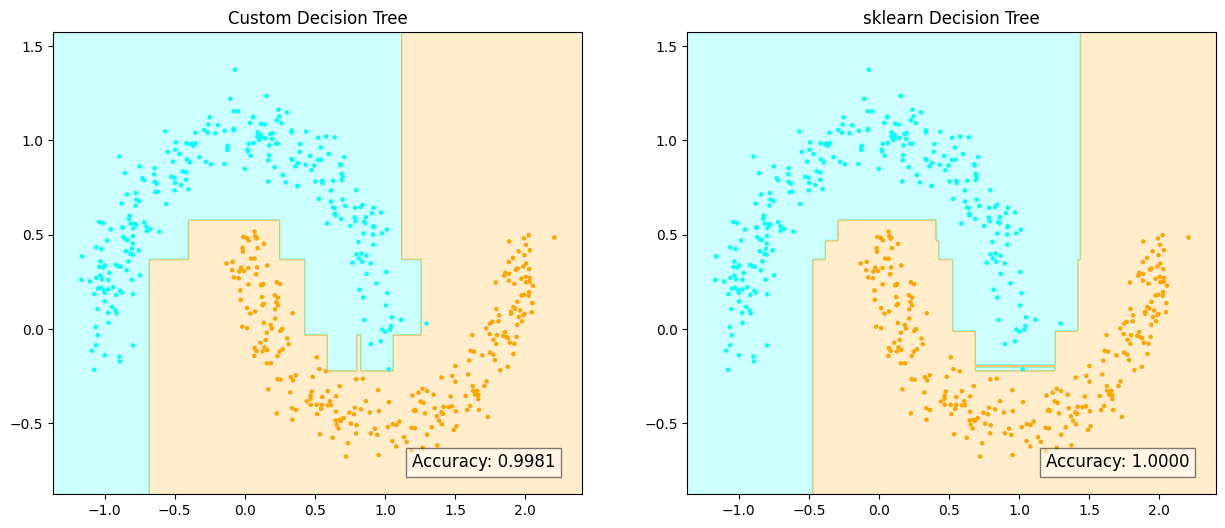

In [41]:
xx, yy = create_meshgrid(X_moons)

Z_custom = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom = np.array(Z_custom).reshape(xx.shape)

Z_sklearn = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

plot_decision_boundary(dt, X_test_moons, y_test_moons, 'Custom Decision Tree', ax1, 'cyan', 'orange', accuracy)
plot_decision_boundary(clf, X_test_moons, y_test_moons, 'sklearn Decision Tree', ax2, 'cyan', 'orange',  accuracy_sklearn)

plt.show()

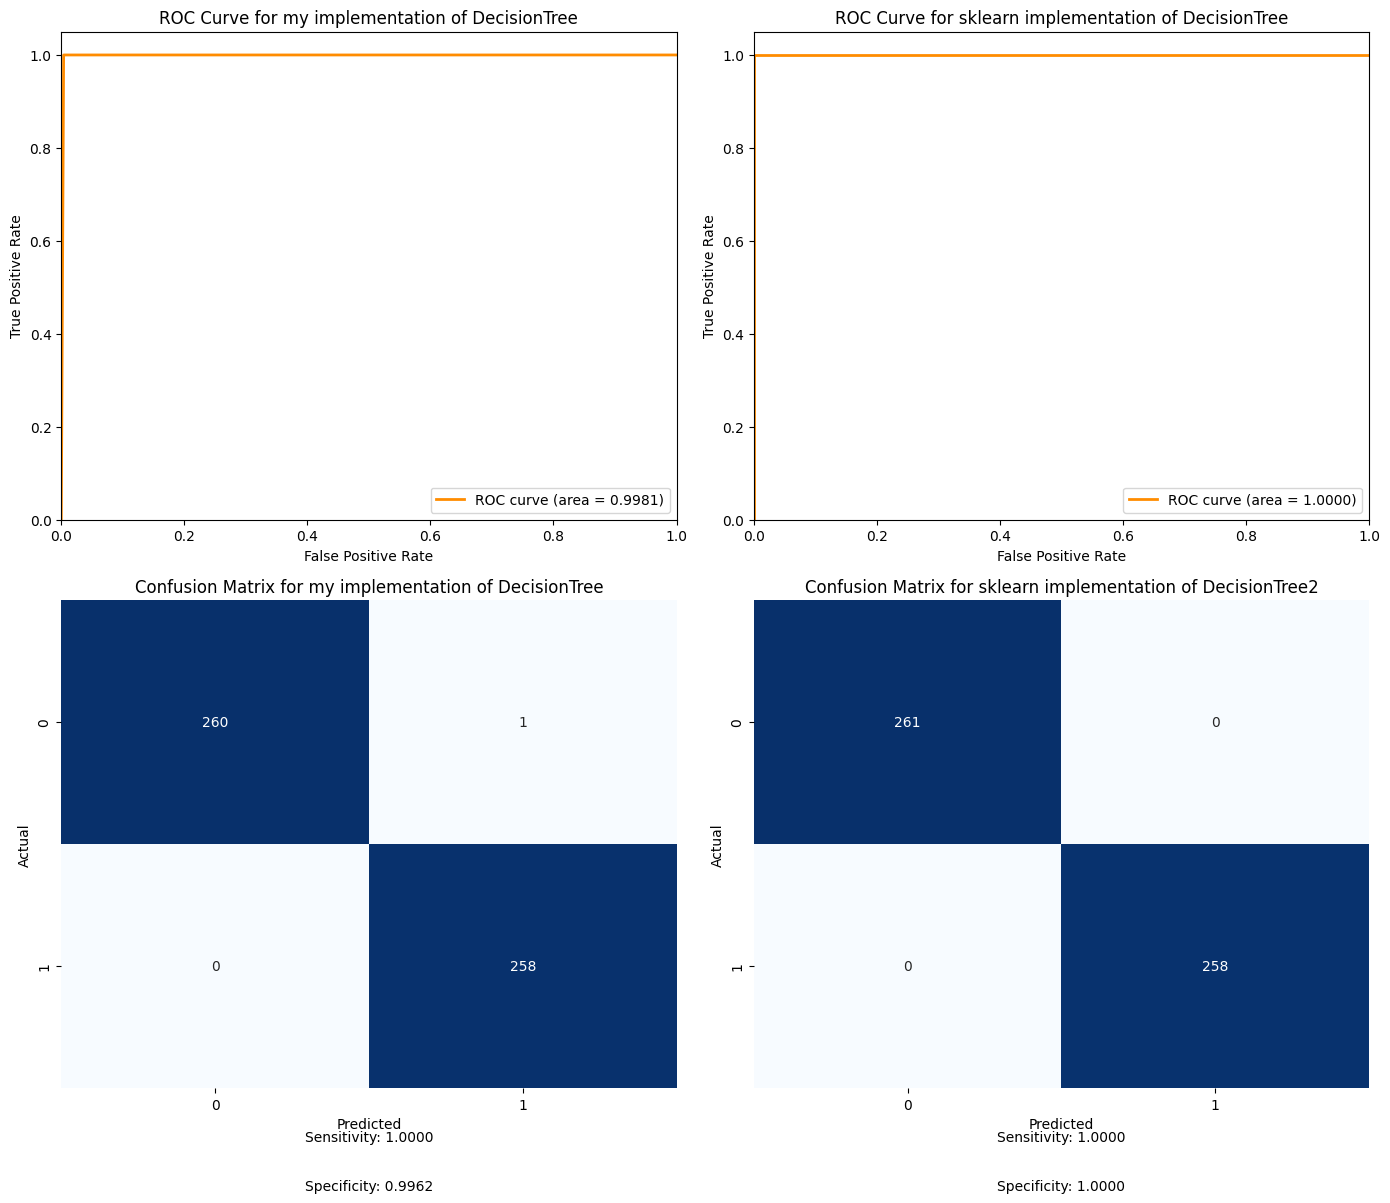

In [42]:
plot_roc_and_confusion(y_test_moons, y_pred, y_pred_sklearn)

In [43]:
X_clf2, y_clf2 = make_classification(random_state=random_state, n_samples=2*n_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2)

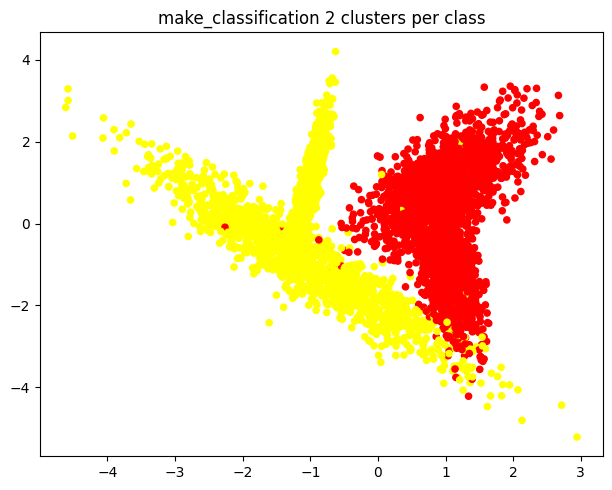

In [44]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_clf2[:, 0], X_clf2[:, 1], c=np.where(y_clf2==0, 'yellow', 'red'), s=20)
plt.title('make_classification 2 clusters per class')

plt.tight_layout()
plt.show()


In [45]:
X_train_clf2, X_test_clf2, y_train_clf2, y_test_clf2 = train_test_split(X_clf2, y_clf2, test_size=0.2, random_state=random_state)


In [46]:
x_intersections_for_clf2 = np.linspace(-3.5, 4.5, 8000)
y_intersections_for_clf2 = np.linspace(-4.5, 2, 6500)

In [47]:
A_train_clf2 = X_train_clf2[y_train_clf2 == 0]
B_train_clf2 = X_train_clf2[y_train_clf2 == 1]

In [48]:
dt = DecisionTree()
dt.fit(A_train_clf2, B_train_clf2, x_intersections_for_clf2, y_intersections_for_clf2)
y_pred = dt.predict(X_test_clf2)
accuracy = accuracy_score(y_test_clf2, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9788053949903661


In [49]:
clf = DecisionTreeClassifier()
clf.fit(X_train_clf2, y_train_clf2)
y_pred_sklearn = clf.predict(X_test_clf2)
accuracy_sklearn = accuracy_score(y_test_clf2, y_pred_sklearn)
print(f"Accuracy (sklearn): {accuracy_sklearn}")

Accuracy (sklearn): 0.9788053949903661


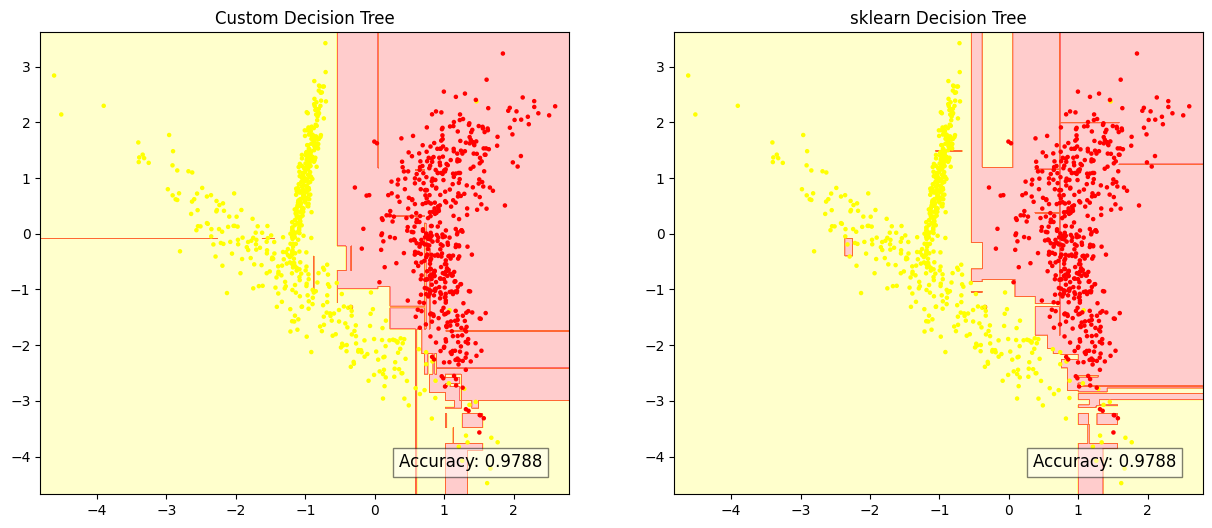

In [50]:
xx, yy = create_meshgrid(X_clf2)

Z_custom = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom = np.array(Z_custom).reshape(xx.shape)

Z_sklearn = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

plot_decision_boundary(dt, X_test_clf2, y_test_clf2, 'Custom Decision Tree', ax1, 'yellow', 'red', accuracy)
plot_decision_boundary(clf, X_test_clf2, y_test_clf2, 'sklearn Decision Tree', ax2, 'yellow', 'red',  accuracy_sklearn)

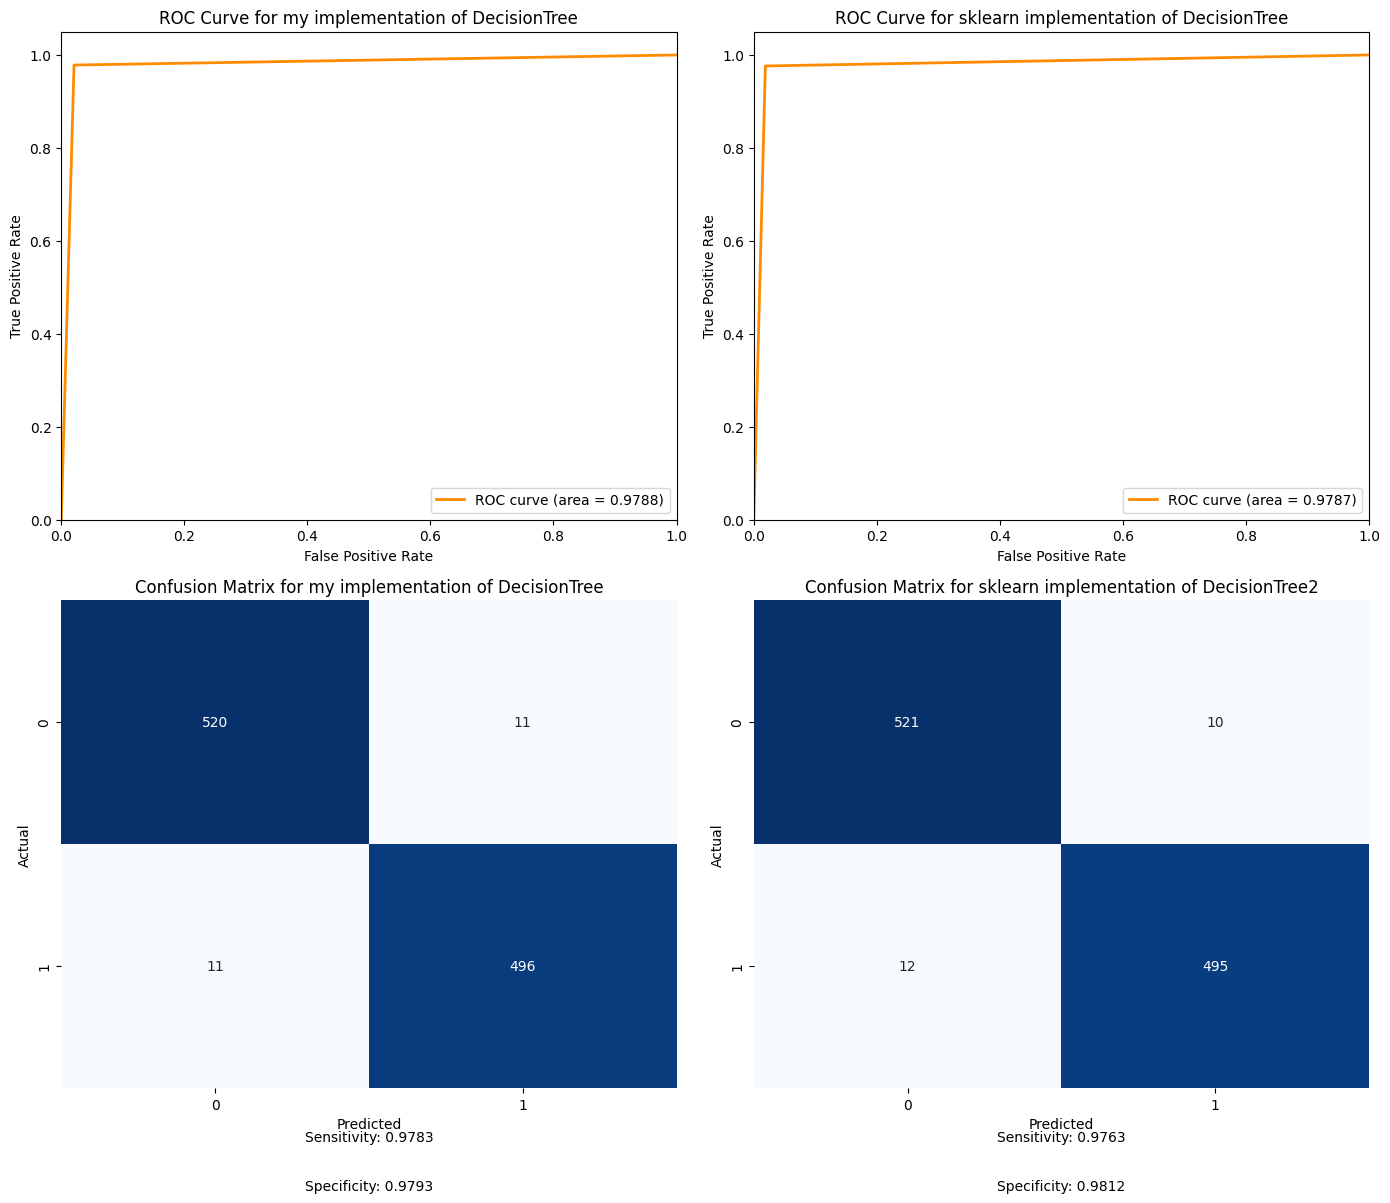

In [51]:
plot_roc_and_confusion(y_test_clf2, y_pred, y_pred_sklearn)

# Pulsary

In [52]:
data = pd.read_csv('HTRU_2.csv')
data = data.astype(float)
data

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0.0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0.0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0.0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0.0


In [53]:
df = pd.DataFrame(data)

In [54]:
X = df.loc[:, df.columns != 'class']
y = df['class']

In [55]:
stats_df_before_winsorizing = pd.DataFrame()
for col in X.columns:
    stats_df_before_winsorizing[col] = data[col].describe()
stats_df_before_winsorizing = stats_df_before_winsorizing.T
stats_df_before_winsorizing

,count,mean,std,min,25%,50%,75%,max
Profile_mean,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
Profile_stdev,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
Profile_skewness,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Profile_kurtosis,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
DM_mean,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392141
DM_stdev,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
DM_skewness,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
DM_kurtosis,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309330,1191.000837


In [56]:
for col in X.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    lower_limit = (data[col] < lower_bound).mean()
    upper_limit = (data[col] > upper_bound).mean()
    
    data[col] = winsorize(data[col], limits=(lower_limit, upper_limit))

In [57]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [58]:
stats_df_after_winsorizing= pd.DataFrame()
for col in X.columns:
    stats_df_after_winsorizing[col] = data[col].describe()
stats_df_after_winsorizing = stats_df_after_winsorizing.T
stats_df_after_winsorizing

,count,mean,std,min,25%,50%,75%,max
Profile_mean,17898.0,112.482928,21.468300,61.710938,100.929688,115.078125,127.085938,166.242188
Profile_stdev,17898.0,46.495885,6.593012,29.418568,42.376018,46.947479,51.023202,63.919627
Profile_skewness,17898.0,0.286708,0.384401,-0.642108,0.027098,0.223240,0.473325,1.142333
Profile_kurtosis,17898.0,0.514347,0.980756,-1.791886,-0.188572,0.198710,0.927783,2.601154
DM_mean,17898.0,4.258836,3.351862,0.213211,1.923077,2.801839,5.464256,10.774247
DM_stdev,17898.0,23.529181,12.612163,7.370432,14.437332,18.461316,28.428104,49.373372
DM_skewness,17898.0,8.219854,4.248206,-1.597527,5.781506,8.433515,10.702959,18.083213
DM_kurtosis,17898.0,97.891670,80.681653,-1.976976,34.960504,83.064556,139.309330,295.514558


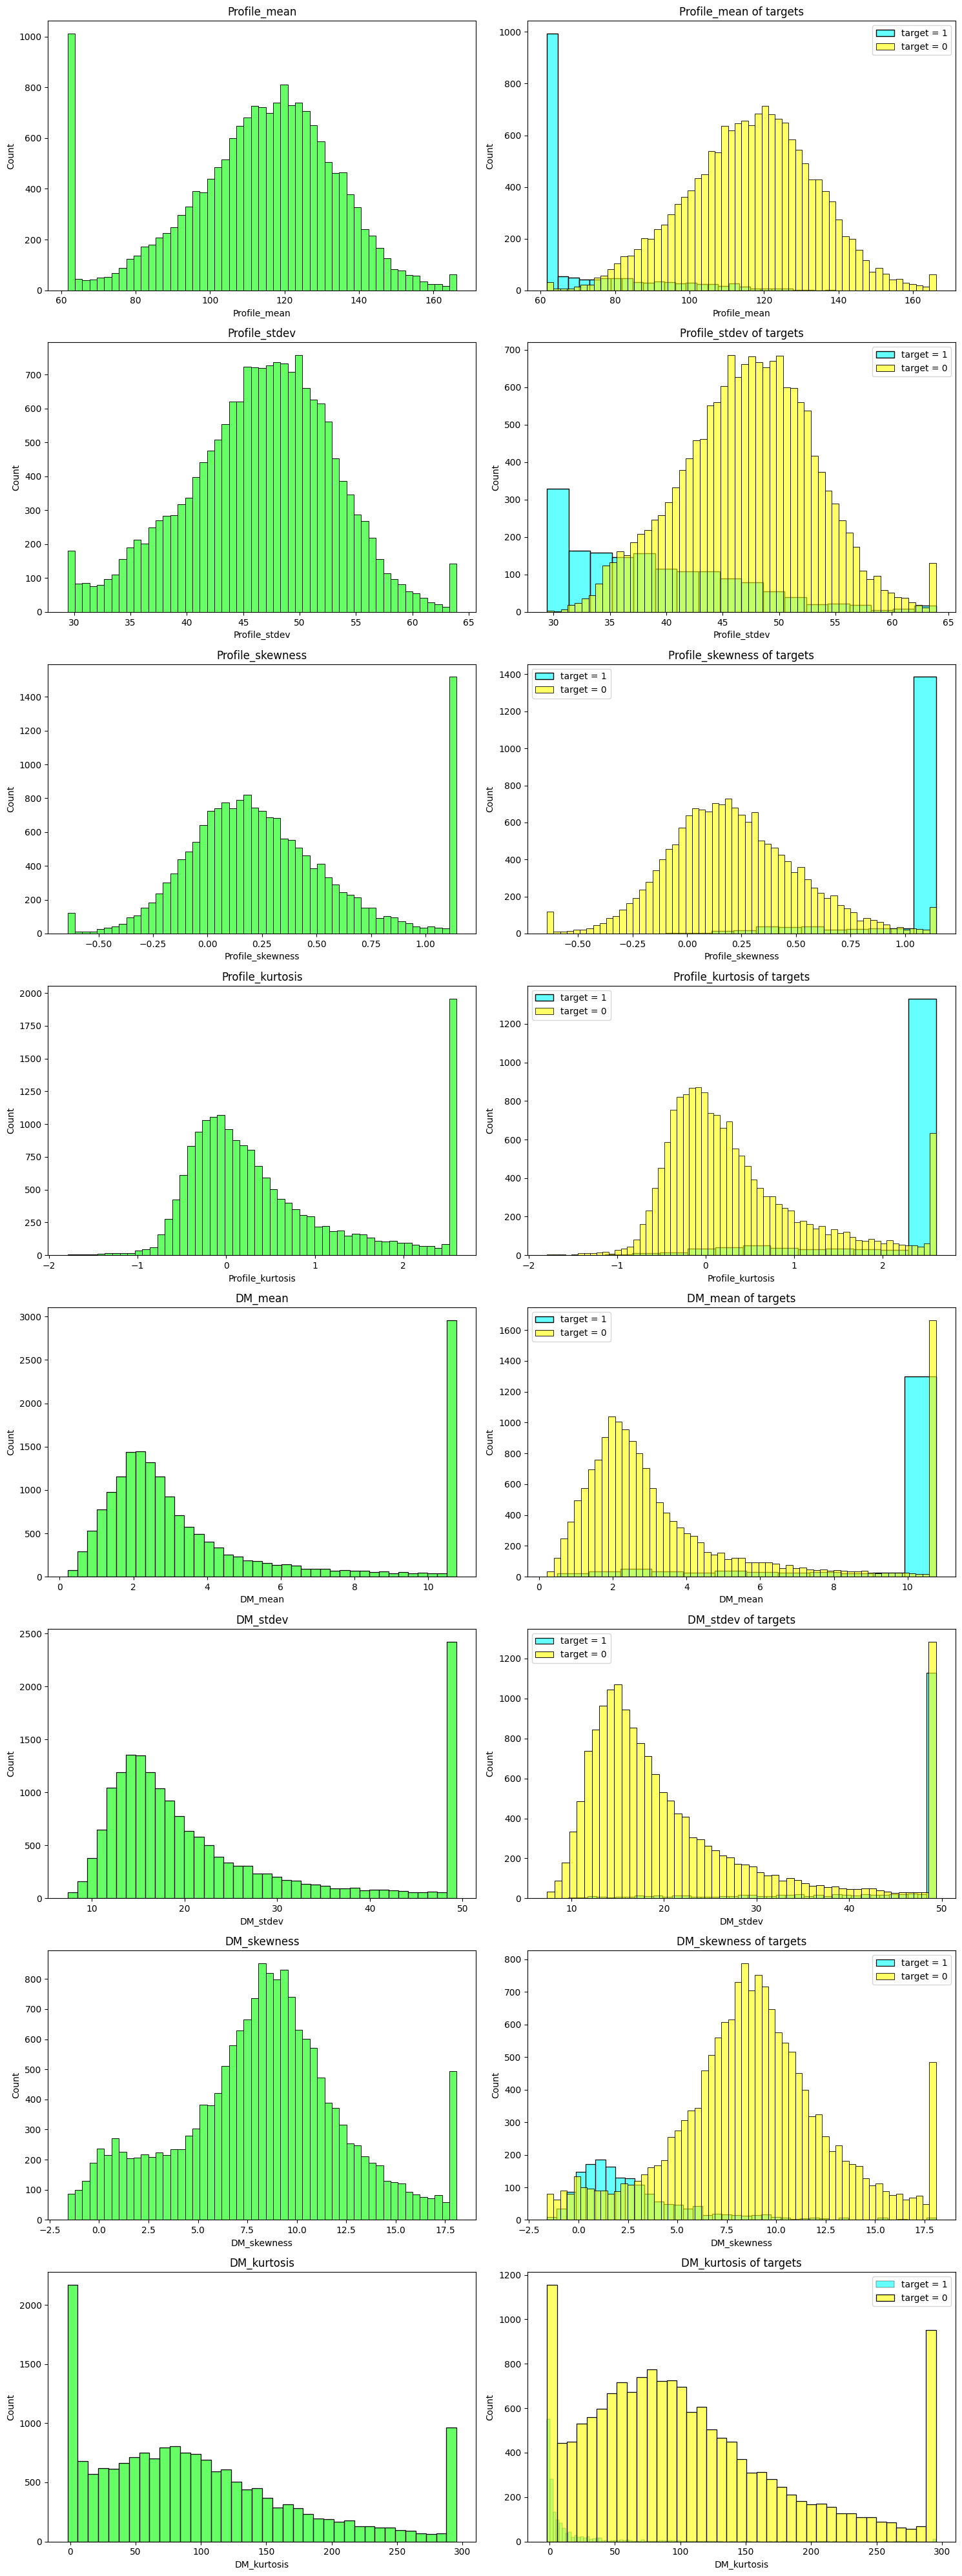

In [59]:
fig, axes = plt.subplots(len(data.columns) - 1, 2, figsize=(15, 5*(len(data.columns) - 1)))

for i, column in enumerate(data.columns):
    if column != 'class':
        sns.histplot(data[column], kde=False, ax=axes[i][0], color='lime', alpha=0.6)
        axes[i][0].set_title(f'{column}')
        sns.histplot(data[data['class'] == 1][column], color='cyan', kde=False, ax=axes[i][1], alpha=0.6)
        sns.histplot(data[data['class'] == 0][column], color='yellow', kde=False, ax=axes[i][1], alpha=0.6)
        axes[i][1].legend(['target = 1', 'target = 0'])
        axes[i][1].set_title(f'{column} of targets')

plt.tight_layout()
plt.show()

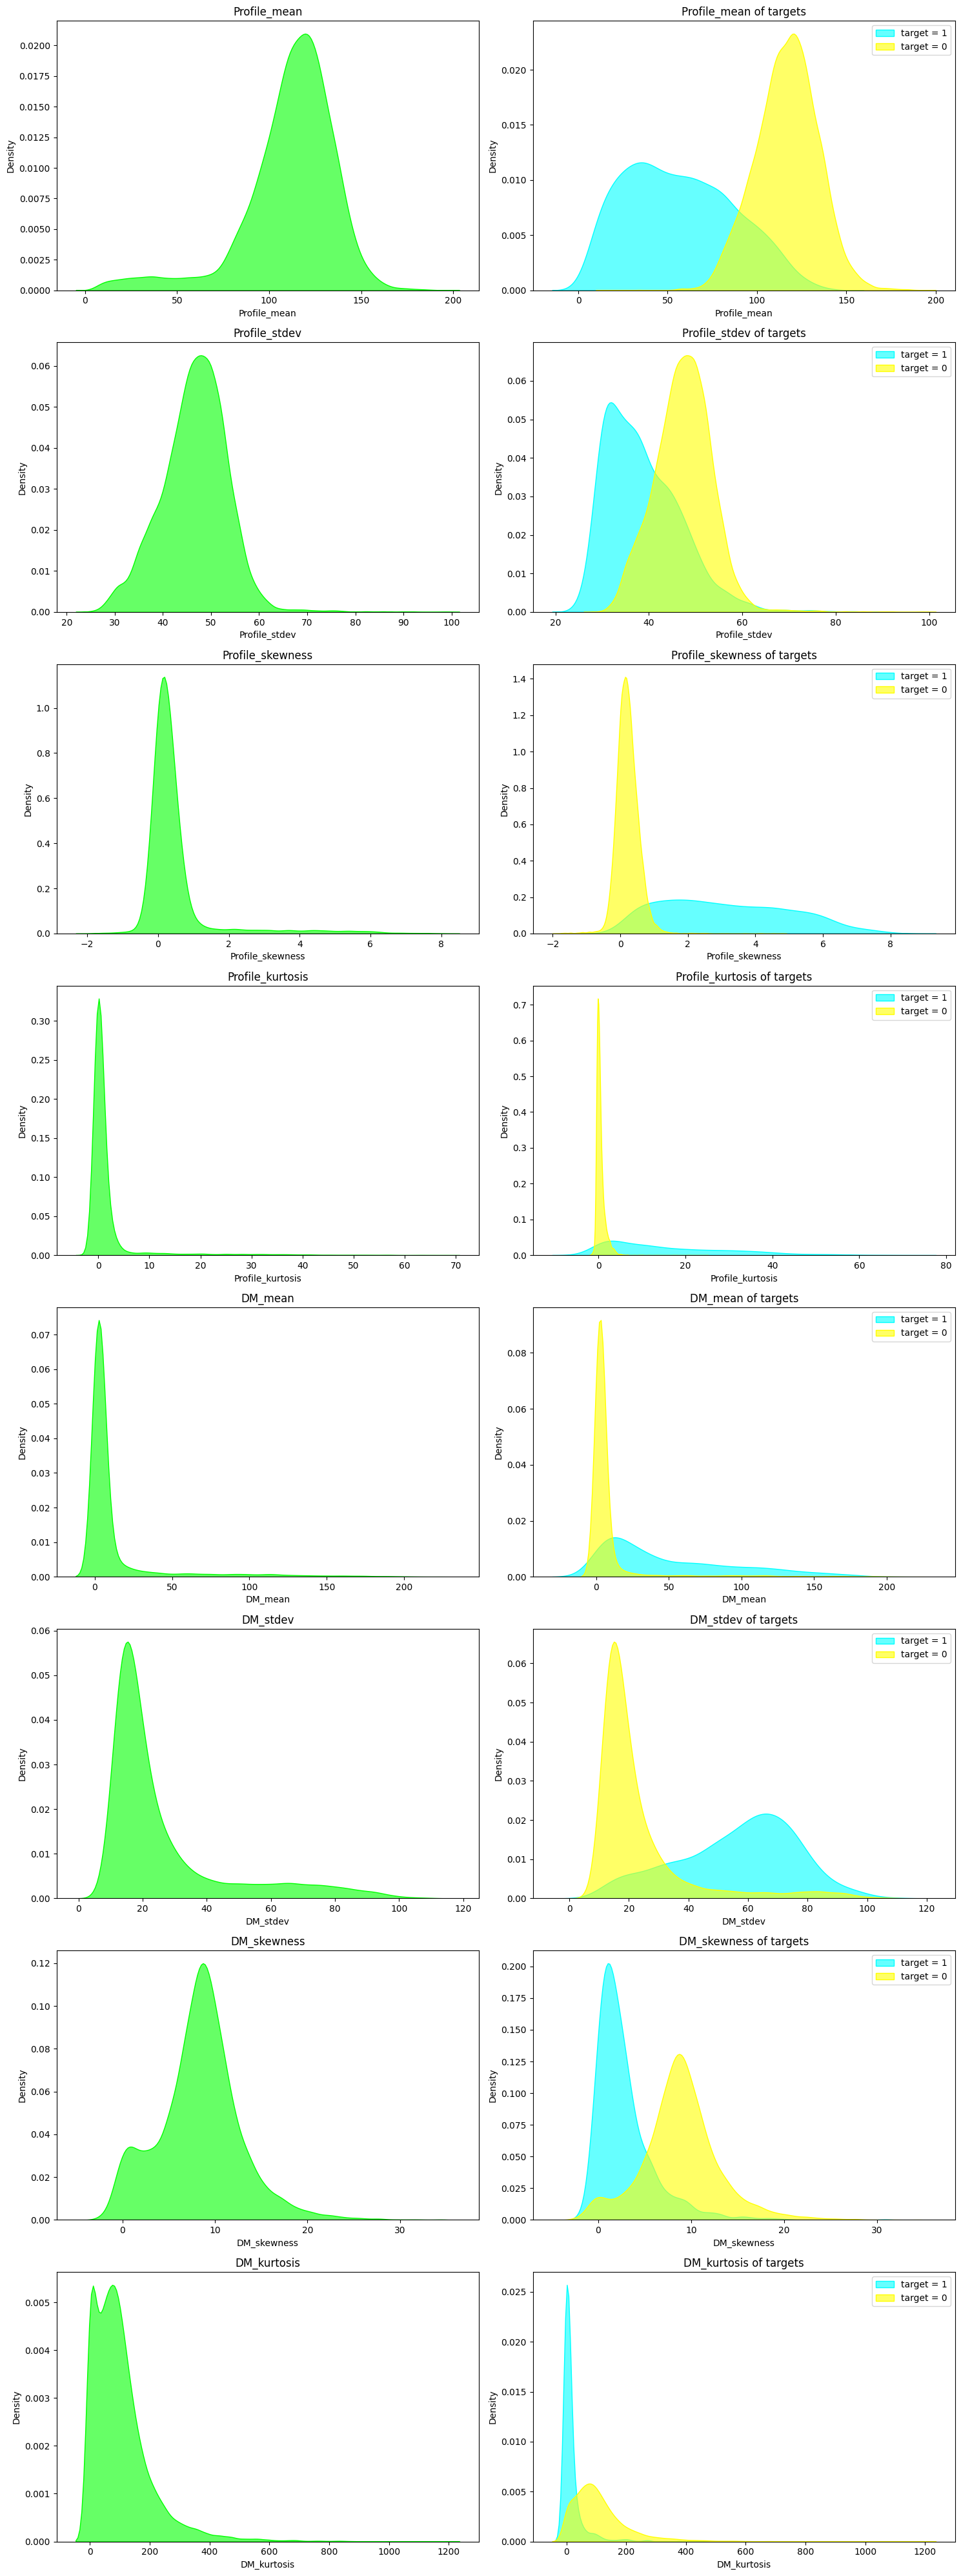

In [60]:
import seaborn as sns

fig, axes = plt.subplots(len(df.columns) - 1, 2, figsize=(15, 5*(len(df.columns) - 1)))
for i, column in enumerate(df.columns):
    if column != 'class':
        sns.kdeplot(df[column], ax=axes[i][0], color='lime', fill=True, alpha=0.6)
        axes[i][0].set_title(f'{column}')
        sns.kdeplot(df[df['class'] == 1][column], ax=axes[i][1], color='cyan', fill=True, alpha=0.6)
        sns.kdeplot(df[df['class'] == 0][column], ax=axes[i][1], color='yellow', fill=True, alpha=0.6)
        axes[i][1].legend(['target = 1', 'target = 0'])
        axes[i][1].set_title(f'{column} of targets')

plt.tight_layout()
plt.show()


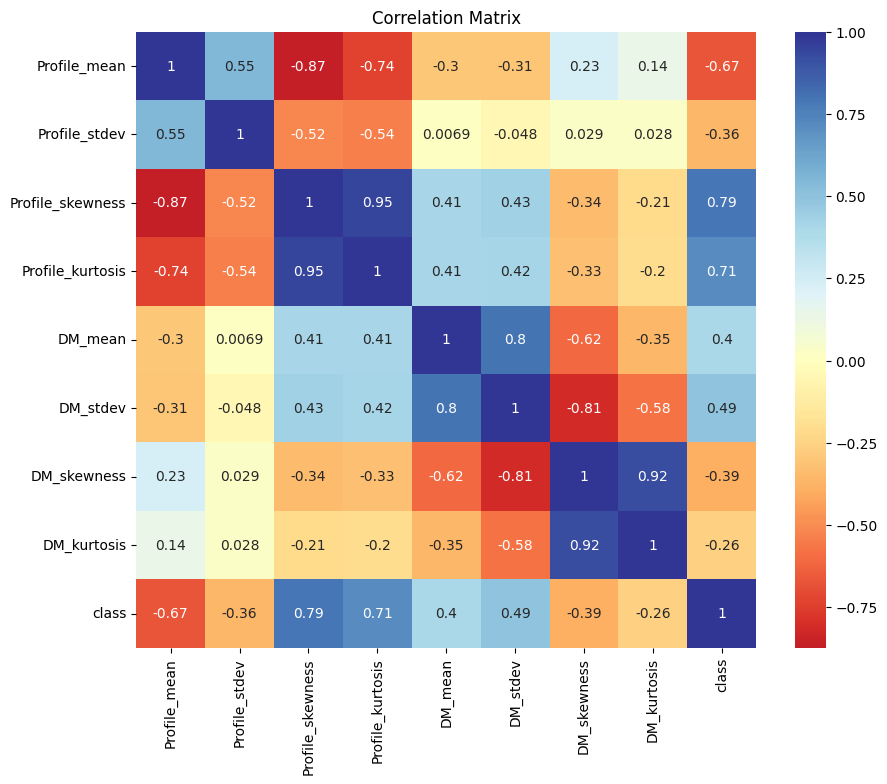

In [61]:
data = pd.concat([X, y], axis=1)
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', center=0)
plt.title('Correlation Matrix')
plt.show()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
dtree = DecisionTreeClassifier(random_state=random_state)

In [64]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [65]:
# Skonfigurowanie GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Uruchomienie GridSearchCV
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych hiperparametrów
print("Best parameters found: ", grid_search.best_params_)

# Wytrenowanie drzewa decyzyjnego z najlepszymi hiperparametrami
best_dtree = grid_search.best_estimator_

# Ocena modelu na zestawie testowym
y_pred = best_dtree.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3259
         1.0       0.89      0.83      0.86       321

    accuracy                           0.98      3580
   macro avg       0.94      0.91      0.92      3580
weighted avg       0.97      0.98      0.98      3580



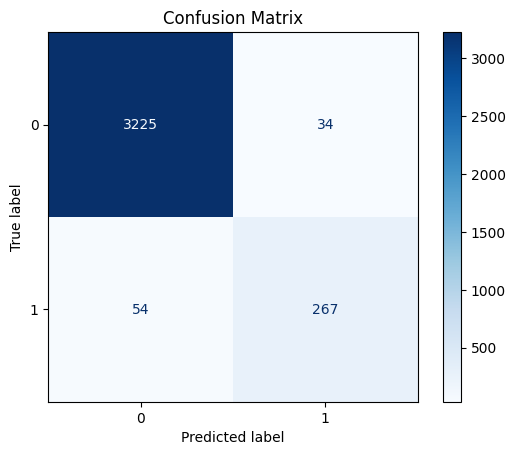

In [66]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

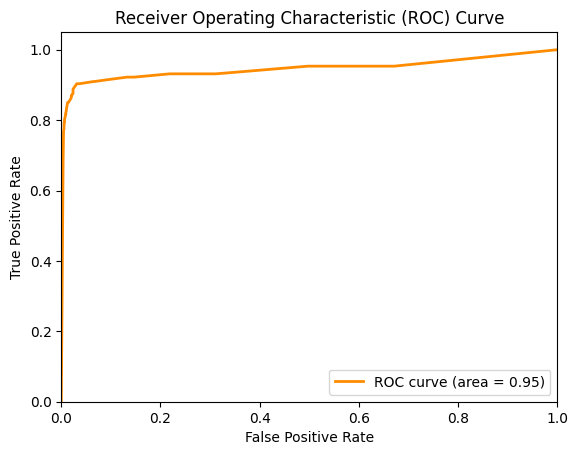

In [67]:
y_proba = best_dtree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [68]:
def evaluate_model(max_depth, n_repeats=10):
    accuracies = []
    times = []
    all_y_preds = []
    
    for _ in range(n_repeats):
        start_time = time.time()
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        start_time = time.time()
        y_pred = model.predict(X_test)
        inference_time = time.time() - start_time
        
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        times.append((train_time, inference_time))
        all_y_preds.append(y_pred)
    
    avg_accuracy = np.mean(accuracies)
    avg_train_time = np.mean([t[0] for t in times])
    avg_inference_time = np.mean([t[1] for t in times])
    
    return avg_accuracy, avg_train_time, avg_inference_time, all_y_preds[0]

Depth: 1, Accuracy: 0.9777, Train time: 0.0302s, Inference time: 0.0013s
Depth: 5, Accuracy: 0.9788, Train time: 0.1220s, Inference time: 0.0010s
Depth: 10, Accuracy: 0.9749, Train time: 0.2343s, Inference time: 0.0011s
Depth: 15, Accuracy: 0.9732, Train time: 0.2666s, Inference time: 0.0010s
Depth: 20, Accuracy: 0.9707, Train time: 0.2782s, Inference time: 0.0014s
Depth: 25, Accuracy: 0.9707, Train time: 0.2950s, Inference time: 0.0010s
Depth: 30, Accuracy: 0.9707, Train time: 0.2718s, Inference time: 0.0012s


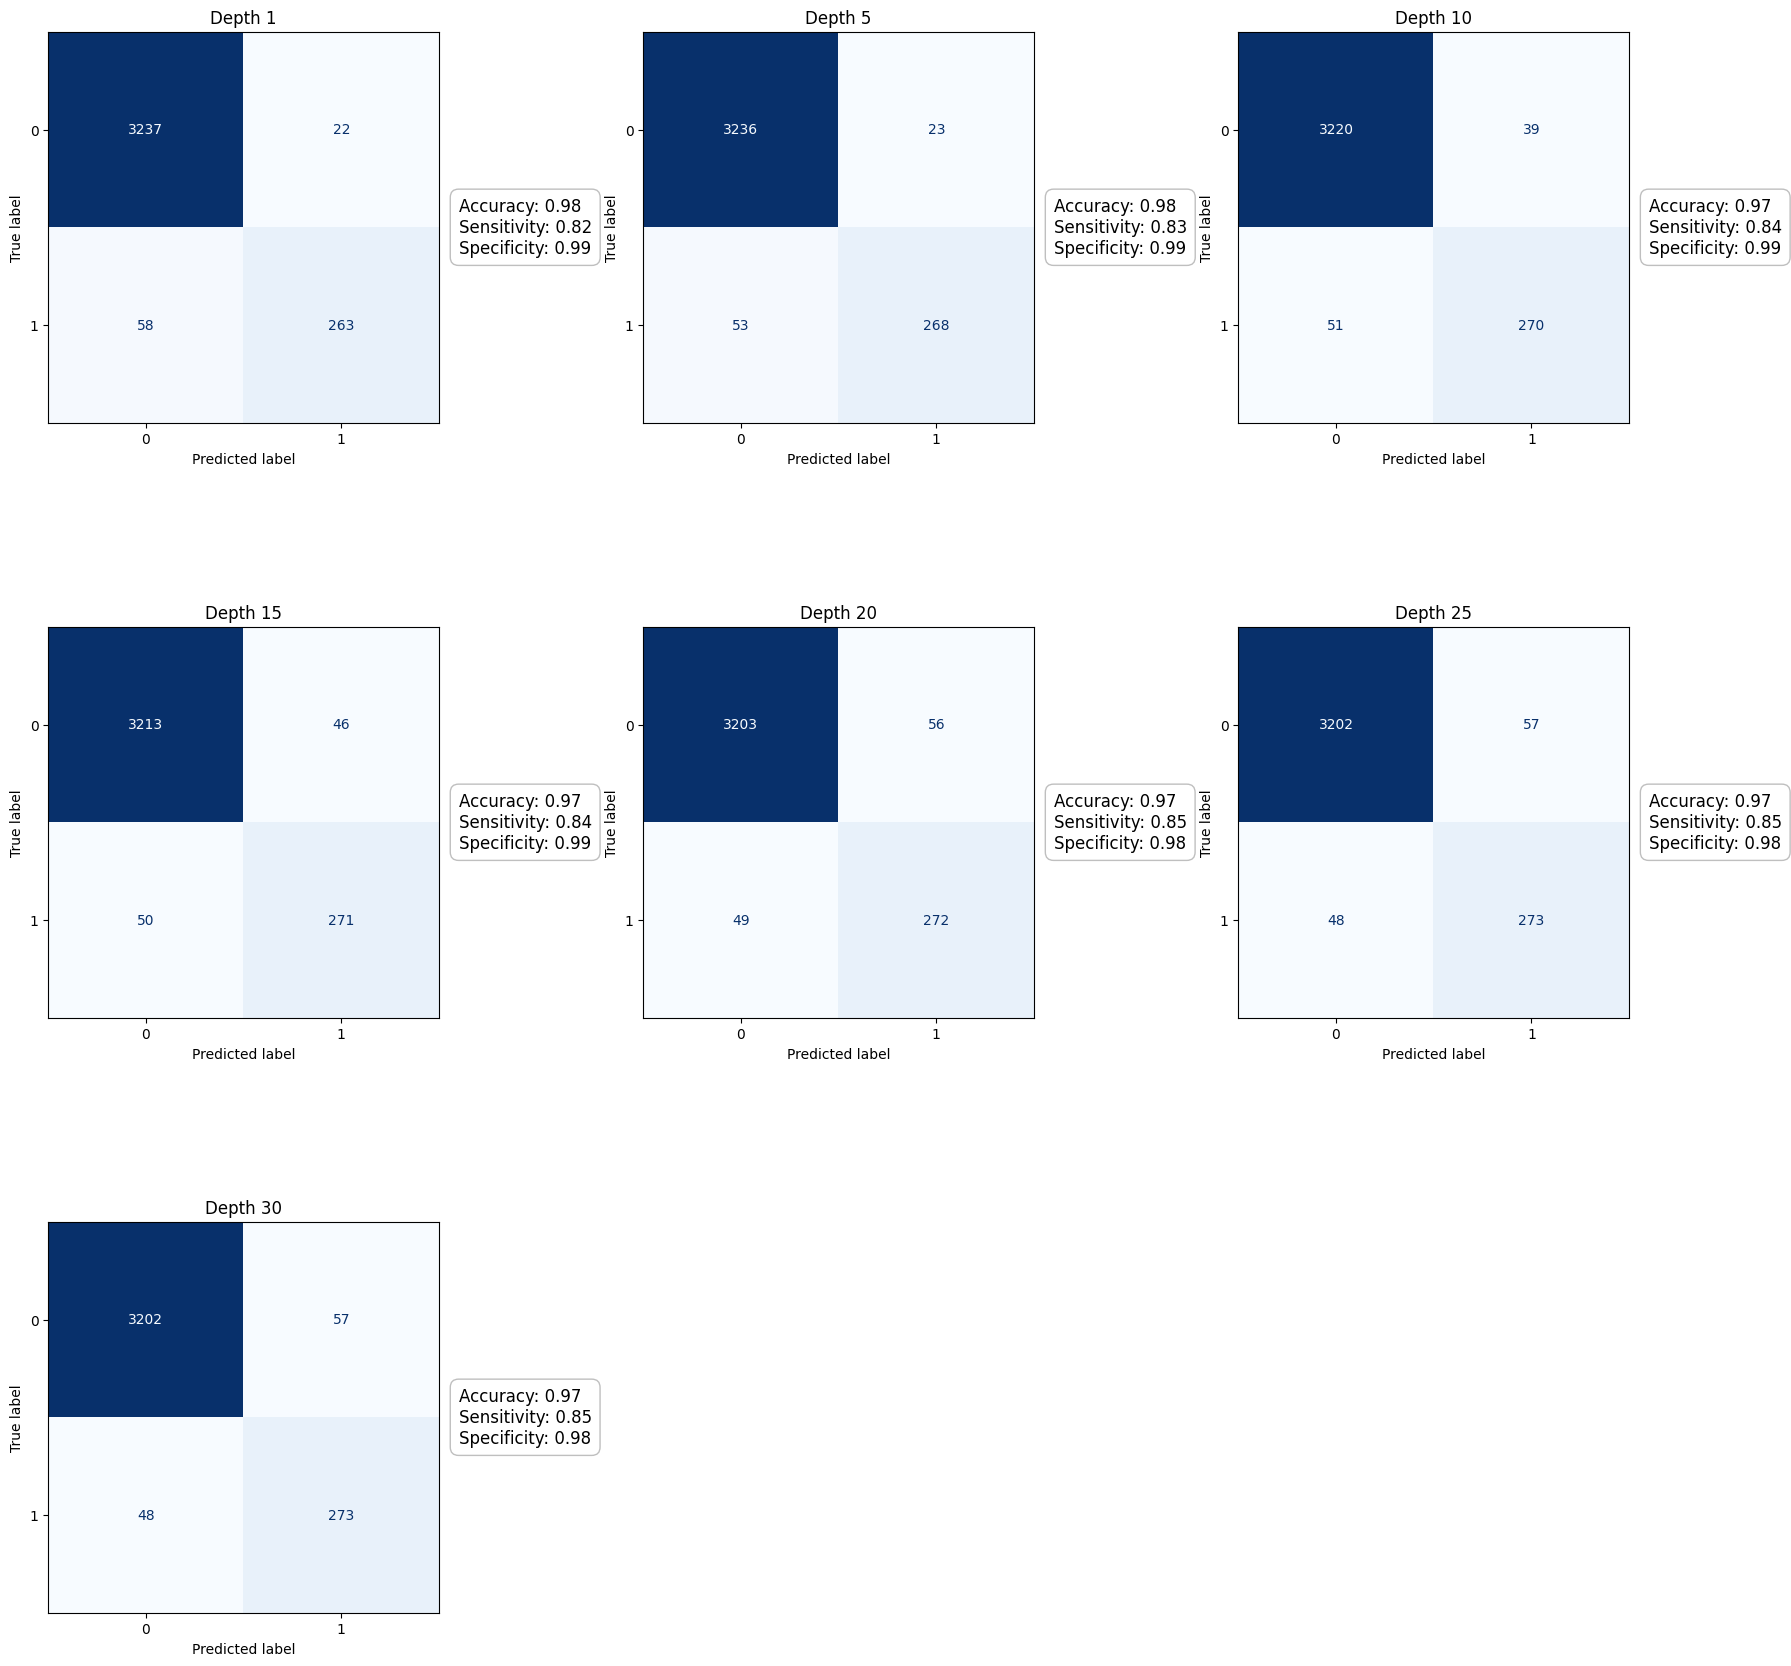

In [69]:
depths = [1, 5, 10, 15, 20, 25, 30] 
results = []
confusion_matrices = []

for depth in depths:
    accuracy, train_time, inference_time, y_pred = evaluate_model(max_depth=depth, n_repeats=10)
    results.append((depth, accuracy, train_time, inference_time))
    print(f'Depth: {depth}, Accuracy: {accuracy:.4f}, Train time: {train_time:.4f}s, Inference time: {inference_time:.4f}s')
    
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append((depth, cm, accuracy))

fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for idx, (depth, cm, accuracy) in enumerate(confusion_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=axes[idx], colorbar=False)
    axes[idx].set_title(f'Depth {depth}')
    
    TN, FP, FN, TP = cm.ravel()
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    metrics_text = (f'Accuracy: {accuracy:.2f}\n'
                    f'Sensitivity: {sensitivity:.2f}\n'
                    f'Specificity: {specificity:.2f}')
    
    props = dict(boxstyle='round,pad=0.5', alpha=0.5, edgecolor='gray', facecolor='white')
    axes[idx].text(1.05, 0.5, metrics_text, transform=axes[idx].transAxes, fontsize=12,
                   verticalalignment='center', bbox=props)

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])


    

plt.tight_layout()
plt.show()

In [70]:
def plot_results(results_df):
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    axes[0].plot(results_df['Depth'], results_df['Accuracy'], marker='o', color='blue', linestyle='-')
    axes[0].set_title('Accuracy vs. Depth')
    axes[0].set_xlabel('Depth')
    axes[0].set_ylabel('Accuracy')
    
    axes[1].plot(results_df['Depth'], results_df['Train Time'], marker='o', color='green', linestyle='-')
    axes[1].set_title('Train Time vs. Depth')
    axes[1].set_xlabel('Depth')
    axes[1].set_ylabel('Train Time (s)')
    
    axes[2].plot(results_df['Depth'], results_df['Inference Time'], marker='o', color='red', linestyle='-')
    axes[2].set_title('Inference Time vs. Depth')
    axes[2].set_xlabel('Depth')
    axes[2].set_ylabel('Inference Time (s)')
    
    plt.tight_layout()
    plt.show()


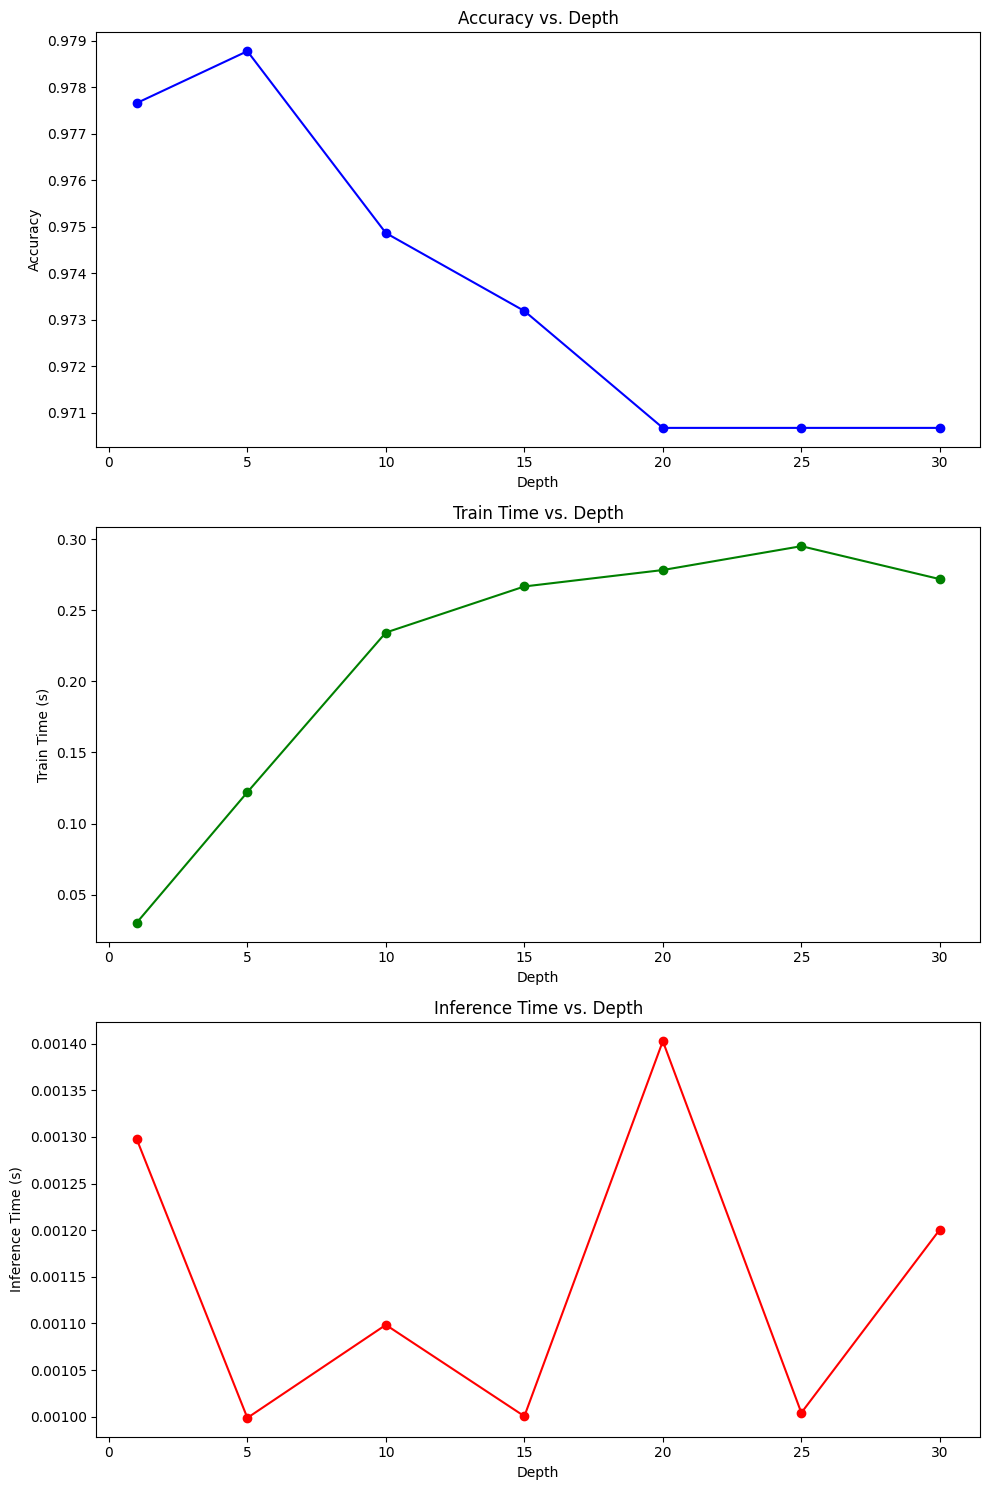

In [71]:
results_df = pd.DataFrame(results, columns=['Depth', 'Accuracy', 'Train Time', 'Inference Time'])
plot_results(results_df)